In [16]:
# imports
import pandas as pd  # análise, leitura e manipulação de dados (tabelas, CSV, DataFrames)
import numpy as np   # cálculos numéricos, arrays e operações matemáticas
import matplotlib.pyplot as plt  # criar gráficos estáticos (linha, barra, dispersão, etc.)
import seaborn as sns  # gráficos estatísticos mais bonitos e complexos (baseada no matplotlib)
import plotly.express as px  # gráficos interativos, com zoom, hover e animações



In [17]:
df = pd.read_csv("plano_saude.csv")
df

,idade,custo
0,18,871
1,23,1100
2,25,1393
3,33,1654
4,34,1915
5,43,2100
6,48,2356
7,51,2698
8,58,2959
9,63,3000


# Função de Regressão Linear

Cálculos de **Coeficiente de Correlação** , **Inclinação** , **Intersecção** , e **Previsão**

In [18]:
def PrevLinearRegression(x, y, v):
    x = np.array(x)
    y = np.array(y)
    
    cov_xy = np.corrcoef(x, y)[0,1]  # corref gera uma matriz para fazer a correlação de dados
    inclination = cov_xy*(np.std(y)/np.std(x))
    intersection = np.mean(y) - inclination * np.mean(x)
    prevision = intersection + inclination * v 
    return float(prevision)

### Previsão
Previsão do custo de um plano de saúde para uma pessoa de 54 anos de idade

In [19]:
x = df['idade']
y = df["custo"]

lr = PrevLinearRegression(x, y, 54)
print(f"O custo para uma pessoa de 54 anos de idade é R$ {round(lr, 2)}")

O custo para uma pessoa de 54 anos de idade é R$ 2657.36


### Heatmap de Correlações
Usado para visualizar rapidamente quais variáveis tem correlação forte entre si.  
**+1** Correlação perfeita positiva  
**0**  Nenhuma correlação linear  
**-1** Correlação linear perfeita negativa

<Axes: >

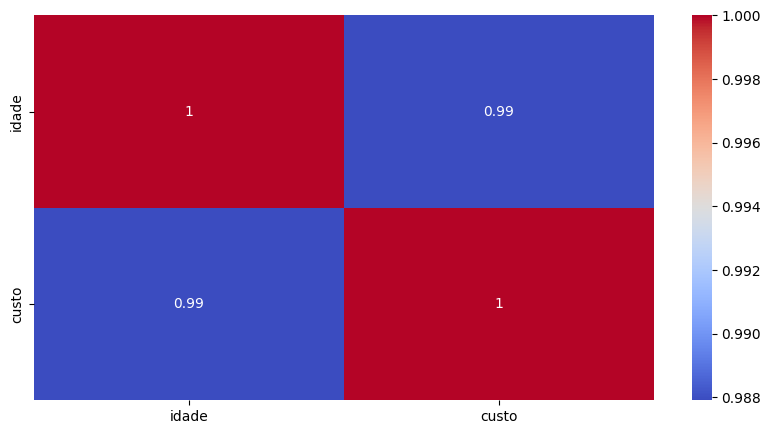

In [20]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

###  Reformatando x para Sklearn

Sklearn sempre espera x como uma tabela, mesmo que exista só uma coluna  
1D  [23, 45, 51]   **X Não**  
2D  [[23], [45], [51]] **O Sim**

In [21]:
x = x.values.reshape(-1, 1) #ajusta o formato da varável
x.shape

(11, 1)

# Treinamento do Modelo Regressão Linear
Criando um objeto - modelo (untrained). Feito isso, os dados são ajustados (Solução dos Mínimos Quadráticos, melhor linha possível)

In [22]:
from sklearn.linear_model import LinearRegression

regressor_plan = LinearRegression()
regressor_plan.fit(x, y) # função para treinar os dados (x => features, y => resultado)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Intersecção é o valor de y estimado, para quando x = 0  
Coeficiente de Correlação é o aumento esperado em y para cada unidade adicional de x (no caso, reais por ano de idade)

In [23]:
regressor_plan.intercept_  # retorna a intersecção

regressor_plan.coef_  # retorna o coeficiente de correlação

array([46.45003234])

### Previsão dos Dados

In [24]:
prevision = regressor_plan.predict(x)
prevision

array([ 985.15831177, 1217.40847348, 1310.30853816, 1681.9087969 ,
       1728.35882924, 2146.40912031, 2378.65928202, 2518.00937904,
       2843.15960543, 3075.40976714, 3261.20989651])

### Gráfico com Plotly: Custo(R$) x Idade(anos)
Pontos azuis: dados reais  
Linha vermelha: Linha de Regressão

In [33]:
graphic = px.scatter(x = x.ravel(), y = y)
graphic.add_scatter(x = x.ravel(), y = prevision, name="Regression")
graphic.show()

In [26]:
prevision_54 = regressor_plan.predict([[54]])

print(f"A previsão para 54 anos é: {prevision_54[0]:.2f}")

A previsão para 54 anos é: 2657.36


In [27]:
regressor_plan.score(x.reshape(-1, 1), y)

0.9759542217686598